In [1]:
import cv2
import matplotlib.pyplot as plt

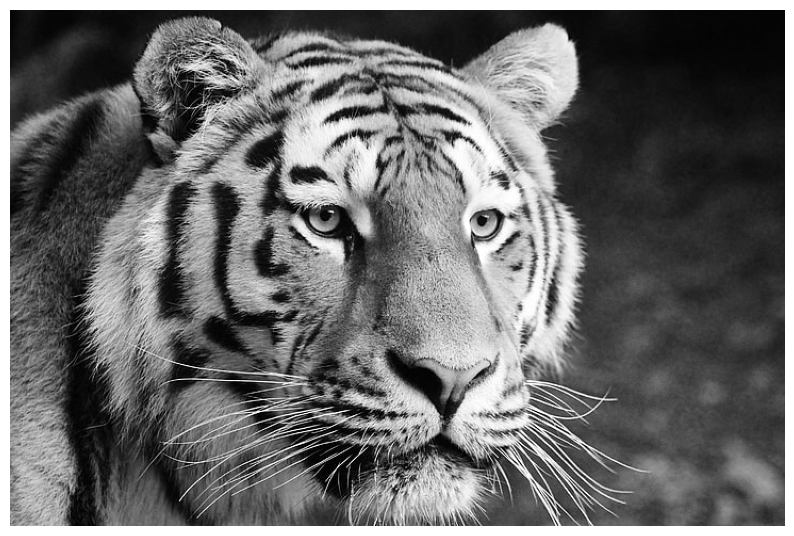

In [ ]:
image = cv2.imread("tiger.jpg",cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10,8))
plt.imshow(image,cmap='gray')
plt.axis("off")
plt.show()

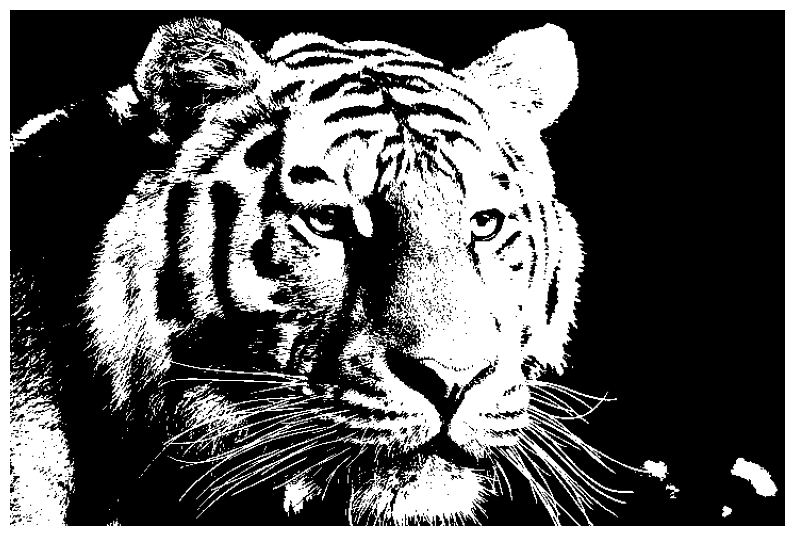

In [7]:
def thresholding(img,T=128):
    w,h = img.shape
    dummy = img.copy()
    for x in range(w):
        for y in range(h):
            dummy[x][y] = 1 if dummy[x][y] > T else 0
    
    return dummy

binary_image = thresholding(image)
plt.figure(figsize=(10,8))
plt.imshow(binary_image,cmap='gray')
plt.axis("off")
plt.show()

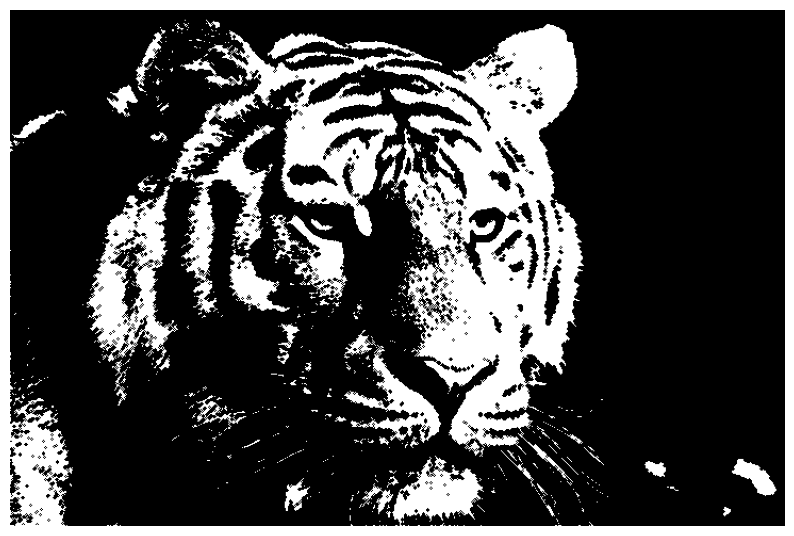

In [ ]:
struc_element = [
    [0,1,0],
    [1,0,1],
    [0,1,0]
]

def fit(img, x, y, struc_element):
    final_result = True
    for j in range(-1, 2):
        for i in range(-1, 2):
            if struc_element[j+1][i+1] == 1:  
                if img[x+j][y+i] == 0:       
                    final_result = False
    return final_result

def erosion(img, struc_element=struc_element):
    w, h = img.shape
    dummy = img.copy()
    result = img.copy()
    for x in range(1, w-1):
        for y in range(1, h-1):
            result[x][y] = fit(dummy, x, y, struc_element)
    return result


eroded_image = erosion(binary_image)
plt.figure(figsize=(10,8))
plt.imshow(eroded_image,cmap='gray')
plt.axis("off")
plt.show()

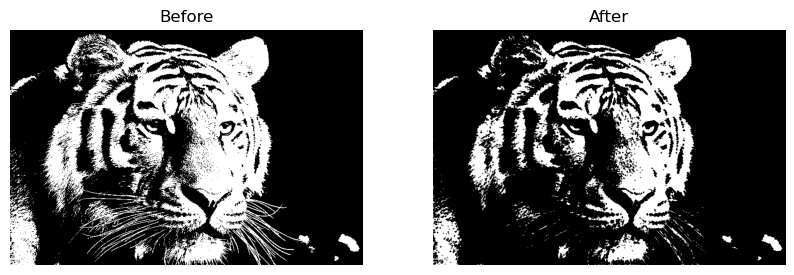

In [ ]:
plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
plt.imshow(binary_image,cmap='gray')
plt.title("Before")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(eroded_image,cmap='gray')
plt.title("After Erosion")
plt.axis("off")

plt.show()

In [22]:
struc_element = [
    [0,1,0],
    [1,0,1],
    [0,1,0]
]

def hit(img, x, y, struc_element):
    final_result = False
    for j in range(-1, 2):
        for i in range(-1, 2):
            if struc_element[j+1][i+1] == 1:  
                if img[x+j][y+i] == 1:       
                    final_result = True
    return final_result

def dilution(img, struc_element=struc_element):
    w, h = img.shape
    dummy = img.copy()
    result = img.copy()
    for x in range(1, w-1):
        for y in range(1, h-1):
            result[x][y] = hit(dummy, x, y, struc_element)
    return result


diluted_image = dilution(binary_image)


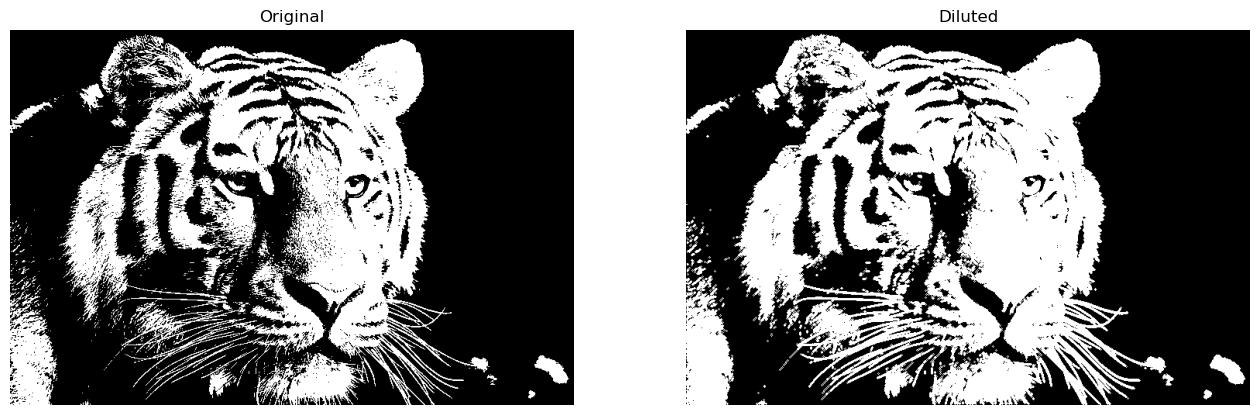

In [ ]:
plt.figure(figsize=(16,10))

plt.subplot(1,2,1)
plt.imshow(binary_image,cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(diluted_image,cmap='gray')
plt.title("Diluted")
plt.axis("off")

plt.show()

In [23]:
struc_element = [
    [0,1,0],
    [1,0,1],
    [0,1,0]
]
def opening(img, struc_element=struc_element):
    result = erosion(img,struc_element)
    result = dilution(result,struc_element)
    return result

opened_img = opening(binary_image)

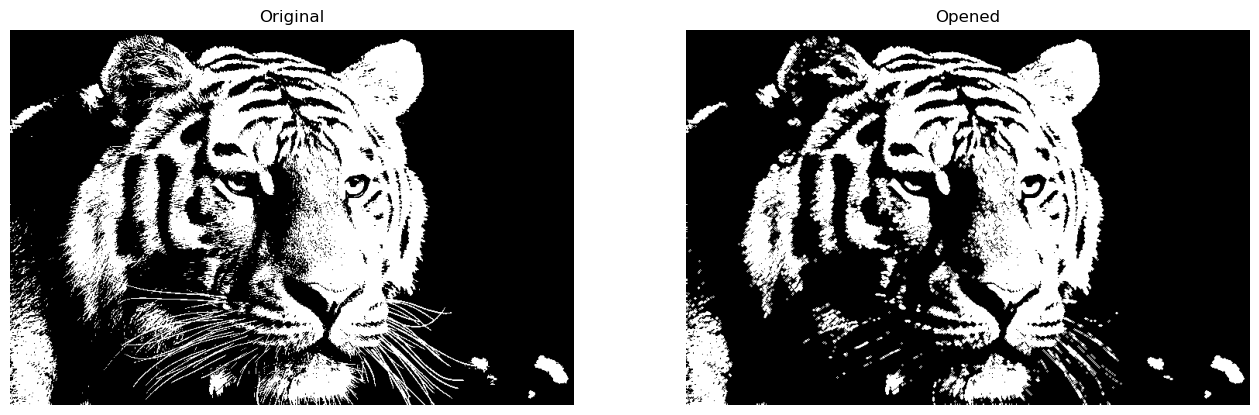

In [25]:
plt.figure(figsize=(16,10))

plt.subplot(1,2,1)
plt.imshow(binary_image,cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(opened_img,cmap='gray')
plt.title("Opened")
plt.axis("off")

plt.show()

In [26]:
struc_element = [
    [0,1,0],
    [1,0,1],
    [0,1,0]
]
def closing(img, struc_element=struc_element):
    result = dilution(img,struc_element)
    result = erosion(result,struc_element)
    return result

closed_img = closing(binary_image)

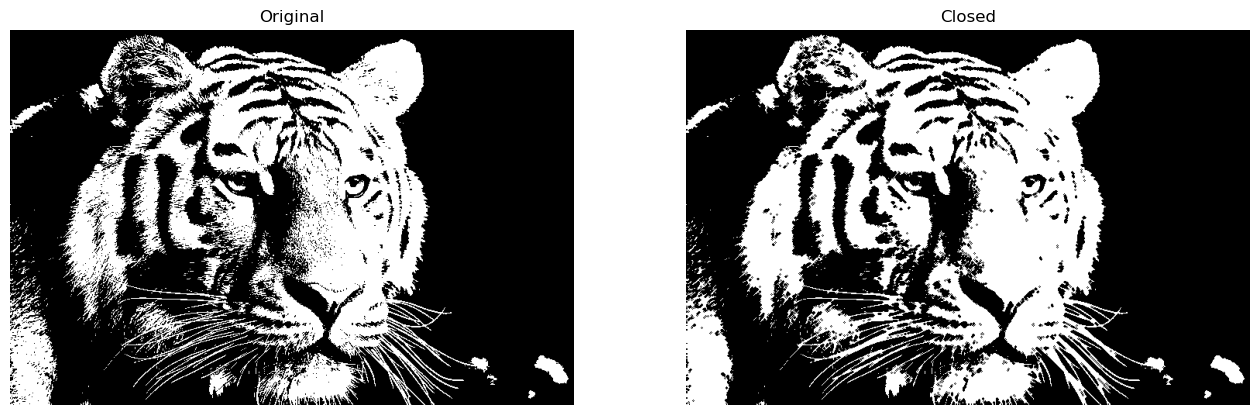

In [27]:
plt.figure(figsize=(16,10))

plt.subplot(1,2,1)
plt.imshow(binary_image,cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(closed_img,cmap='gray')
plt.title("Closed")
plt.axis("off")

plt.show()